In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

root_folder_type = "Debug"
root_folder_compiler = "Intel"
root_folder = "D:\\vs\\source\\repos\\SymPhas\\examples\\simultaneous-configs\\out\\build\\x64-{}-{}\\{}{}".format(
    root_folder_compiler,
    root_folder_type,
    "" if root_folder_compiler == "Intel" else root_folder_type + "\\",
    "simulations",
)

# output_name = "cellular-migration-jamming"
output_name = "model-b"

print(root_folder + "\\" + output_name)

root_folder_name_2 = "D:\\vs\\source\\repos\\SymPhas\\examples\\simultaneous-configs\\simulations\\model-b\\"
folder_time_2 = "2023.10.22.09.54.50\\1"

root_folder_name_1 = "C:\\Users\\Zirconix\\Dropbox\\steven\\"
folder_time_1 = "2023.10.15.13.17.49"
# folder_time_1 = "2023.09.06.21.03.09"
# folder_time_1 = "2023.09.06.21.02.45"

root_folder_name_0 = root_folder + "\\" + output_name + "\\"
# folder_time_0 = "tracking_" + folder_time_1
# folder_time_0 = "2023.09.20.17.05.15"
folder_time_0 = "2023.10.21.15.11.16\\0"

data_folder_name = "\\data\\"
tracking_data_file_name = "abs-data-output_0.txt"
field_data_file_name = "data_0.txt"

D:\vs\source\repos\SymPhas\examples\simultaneous-configs\out\build\x64-Intel-Debug\simulations\model-b


In [2]:

#file_name = root_folder_name_0 + folder_time_0 + data_folder_name + field_data_file_name
file_name = root_folder_name_0 + folder_time_1 + data_folder_name + field_data_file_name
#file_name = root_folder_name_2 + folder_time_2 + data_folder_name + field_data_file_name
data_raw = np.loadtxt(file_name)
frame_starts, = np.where(data_raw[:,0] == 0)

if (len(frame_starts) > 1):
    delta = frame_starts[1] - frame_starts[0]
else:
    delta = len(data_raw)
frames = frame_starts.size

x = data_raw[0, 1:]
y = data_raw[1:delta, 0]
X, Y = np.meshgrid(x, y)

picked_frame = 0
data = data_raw[(picked_frame) * delta + 1:(picked_frame + 1) * delta, 1:]


FileNotFoundError: D:\vs\source\repos\SymPhas\examples\simultaneous-configs\out\build\x64-Intel-Debug\simulations\model-b\2023.10.15.13.17.49\data\data_0.txt not found.

In [ ]:

file_name = root_folder_name_0 + folder_time_0 + data_folder_name + tracking_data_file_name
data_raw = np.loadtxt(file_name)
if (len(data_raw) > 0):
    sort_info = np.array([(t, n) for t, n in data_raw[:,[0,3]]], dtype=[('t', float), ('n', int)]).argsort(order=('n', 't'))
    data_points = np.array([(n, [x, y]) for (_, x, y, n) in data_raw[sort_info]], dtype=[('index', float), ('pos', float, 2)])
    points = np.split(data_points['pos'], np.unique(data_points['index'], return_index=True)[1][1:])
else:
    points = []


In [ ]:
# read a checkpoint

checkpoint_index = 9
max_cols = 150

#checkpoint_name = root_folder_name_1 + folder_time_1 + "\\checkpoint\\" + "data" + str(checkpoint_index)
#checkpoint_name = root_folder_name_0 + folder_time_0 + "\\checkpoint\\" + "data" + str(checkpoint_index)
checkpoint_name = root_folder_name_2 + folder_time_2 + "\\checkpoint\\" + "data" + str(checkpoint_index)
print(checkpoint_name)
data_checkpoint = np.array(pd.read_csv(checkpoint_name, sep=' ', names=[str(i) for i in range(0, max_cols)], engine='python').values, dtype=float)


D:\vs\source\repos\SymPhas\examples\simultaneous-configs\simulations\model-b\2023.10.22.09.54.50\1\checkpoint\data9


In [ ]:
picked_time = 2

current_time = 0
next_line = 0
while next_line < len(data_checkpoint):
    checkpoint_header=data_checkpoint[next_line,:]
    checkpoint_info = checkpoint_header[~np.isnan(checkpoint_header)]
    x0, x1, y0, y1 = checkpoint_info[-4:].astype('int')
    rows = int(y1 - y0) + 1
    cols = int(x1 - x0) + 1
    if next_line > 0:
        current_time = checkpoint_info[0]
    else:
        current_time = checkpoint_info[7]
        
    #print(current_time)
    
    if current_time >= picked_time:
        print("origin at {:d}, {:d}, time={:d}".format(x0, y0, int(current_time)))
        checkpoint = data_checkpoint[next_line + 1:next_line + 1 + int(rows),:]
        checkpoint = checkpoint[~np.isnan(checkpoint)]
        checkpoint = checkpoint.reshape([int(rows), int(cols)])
        break
    else:
        next_line += rows + 1

origin at 276, 194, time=2


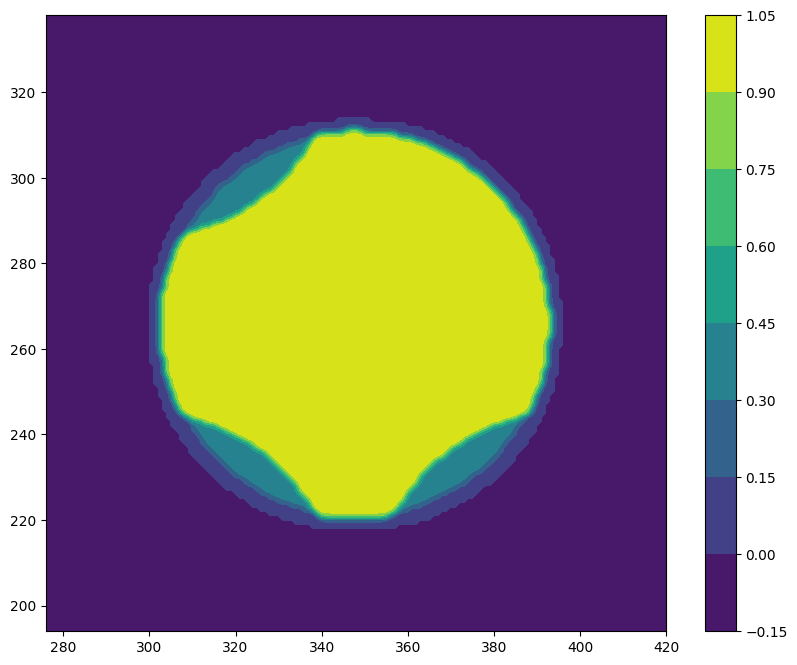

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
ax.set_xlim([x0, x1])
ax.set_ylim([y0, y1])
extent=[x0, x1, y0, y1]
cs = ax.contourf(checkpoint, extent=extent)
cbar = fig.colorbar(cs)


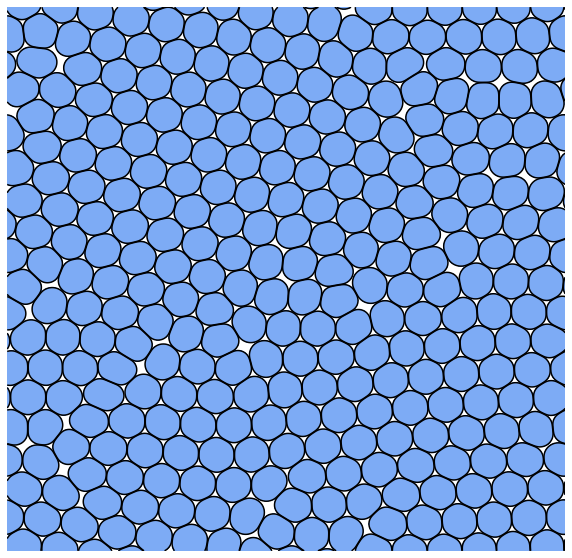

In [ ]:
X, Y = np.meshgrid(x, y)

fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlim([x[0], x[-1]])
ax.set_ylim([y[0], y[-1]])
#problem in cell 127 of 03.15

cell_color = "#7dabf5"
levels=[0.25, 2]
extent=[x[0], x[-1], y[0], y[-1]]

im0 = ax.contourf(data, extent=extent, colors=[cell_color], levels=levels)
im1 = ax.contour(data, extent=extent, colors=["black"], levels=levels)
ax.axis('off')

for p in points[55:56]:
    xp, yp = zip(*p)
    #ax.scatter(xp[0:1] % delta, yp[0:1] % delta)
        #np.max([x0 for x0 in [xp[picked_frame]]]) % 1600, \
        #np.max([y0 for y0 in [yp[picked_frame]]]) % 1600)

fig.savefig('plot_cells.svg', format='svg', bbox_inches='tight')
fig.savefig('plot_cells.png', format='png', bbox_inches='tight')


In [ ]:
vels = np.zeros(len(points), dtype=(float, (len(points[0]) - 1, 2)))
dt = 0.05
dind = 800

i = 0
for p in points:
    vels[i] = (p[1:] - p[:-1]) /  (dt * dind)
    i += 1

#list of v(0) * v(t')
Ds = np.array([[(np.dot(vel[0], v)) for v in vel[-3:]] for vel in vels])

#average of v(0) * v(t') for each cell
Ds = np.average(Ds, axis=0)

# compute D(t)
Ds = [0.5 * np.sum(Ds[:i+1]) * (dt * dind) for i in range(0, len(Ds))]

print(Ds)
np.average(Ds)

[0.002177818340312909, 0.004056224556167554, 0.00564632737910623]


0.003960123425195565

- At $v_A = 0.008$ I get $D(t) = 0.003960123425195565$
- At $v_A = 0.009$ I get $D(t) = 0.003960123425195565$
- At $v_A = 0.010$ I get $D(t) = 0.003960123425195565$